In [6]:
#
# BTC_JPY, FX_BTC_JPYチャートを折れ線グラフで描く
# BTC_JPYとFX_BTC_JPYの価格差チャートを折れ線グラフで描く
#
%matplotlib inline
import datetime
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [7]:
import yaml
f = open('default.yaml', 'r+')
config = yaml.load(f)
f.close()
mongo_url = 'mongodb://' + config['mongo_user'] + ':' + config['mongo_pwd'] + '@' + config['mongo_host'] + ':' + config['mongo_port'] + '/' + config['mongo_db']

In [8]:
client = pymongo.MongoClient(mongo_url)
db = client.bitflyer
fx_btc_jpy = db.lightning_executions_FX_BTC_JPY_OHLC_300
btc_jpy = db.lightning_executions_BTC_JPY_OHLC_300

In [9]:
fx_btc_jpy_date=[]
fx_btc_jpy_price = []
btc_jpy_date=[]
btc_jpy_price = []
diff_price = []

#直近のデータ300件
count = 400

skip = 0
if (fx_btc_jpy.count() > count):
    skip = fx_btc_jpy.count() - count
else:
    count = fx_btc_jpy.count()

for data in fx_btc_jpy.find().skip(skip).sort('id',1):
    fx_btc_jpy_date.append(data['op_date'])
    fx_btc_jpy_price.append(data['cl'])

skip = 0
if (btc_jpy.count() > count):
    skip = btc_jpy.count() - count
else:
    count = btc_jpy.count()

for data in btc_jpy.find().skip(skip).sort('id',1):
    btc_jpy_date.append(data['op_date'])
    btc_jpy_price.append(data['cl'])

l = len(btc_jpy_price)
n = len(fx_btc_jpy_price)
if l > n:
    l = n
for i in range(l):
    diff_price.append(btc_jpy_price[i] - fx_btc_jpy_price[i])

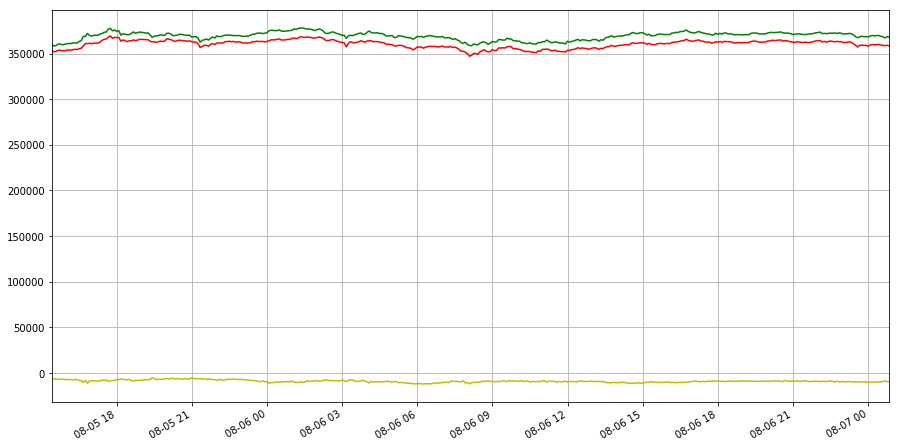

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(fx_btc_jpy_date[0], fx_btc_jpy_date[-1])
ax.plot(fx_btc_jpy_date, fx_btc_jpy_price, color='g')
ax.plot(btc_jpy_date, btc_jpy_price, color='r')
ax.plot(fx_btc_jpy_date, diff_price, color='y')
fig.autofmt_xdate()